In [12]:
import tensorflow as tf
import cv2
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
labels = {'with_mask': 1, 'without_mask': 0}

In [14]:
def load_dataset(top_dir):
    images = []
    target = []
    for root, dirs, files in os.walk(top_dir):
        for name in files:
            try:
                label = root.split('/')[-1]
                img = cv2.imread(os.path.join(root, name))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (96, 96))

                images.append(img)
                target.append(labels[label])
            except:
                continue
                
    images = np.array(images) /255.0
    images = np.reshape(images, (-1, 96, 96, 3))
    target = np.array(target)
    
    return (images, target)

In [15]:
without_mask_test = load_dataset("data/test/without_mask")
with_mask_test = load_dataset("data/test/with_mask")

In [16]:
without_mask_train = load_dataset("data/train/without_mask")
with_mask_train = load_dataset("data/train/with_mask")

In [17]:
# Create train set
X_train = np.concatenate((with_mask_train[0], without_mask_train[0]), axis=0)
y_train = np.concatenate((with_mask_train[1], without_mask_train[1]), axis=0)

In [18]:
# Create test set
X_test = np.concatenate((with_mask_test[0], without_mask_test[0]), axis=0)
y_test = np.concatenate((with_mask_test[1], without_mask_test[1]), axis=0)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',  input_shape=(96, 96, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [20]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/10
42/42 [==============================] - 49s 1s/step - loss: 0.6947 - accuracy: 0.5240 - val_loss: 0.1934 - val_accuracy: 0.9433
Epoch 2/10
42/42 [==============================] - 44s 1s/step - loss: 0.2192 - accuracy: 0.9295 - val_loss: 0.1259 - val_accuracy: 0.9536
Epoch 3/10
42/42 [==============================] - 52s 1s/step - loss: 0.1285 - accuracy: 0.9539 - val_loss: 0.2357 - val_accuracy: 0.8969
Epoch 4/10
42/42 [==============================] - 50s 1s/step - loss: 0.1562 - accuracy: 0.9409 - val_loss: 0.0694 - val_accuracy: 0.9794
Epoch 5/10
42/42 [==============================] - 45s 1s/step - loss: 0.0848 - accuracy: 0.9729 - val_loss: 0.0855 - val_accuracy: 0.9588
Epoch 6/10
42/42 [==============================] - 52s 1s/step - loss: 0.0640 - accuracy: 0.9779 - val_loss: 0.1288 - val_accuracy: 0.9485
Epoch 7/10
42/42 [==============================] - 51s 1s/step - loss: 0.1029 - accuracy: 0.9507 - val_loss: 0.0667 - val_accuracy: 0.9742
Epoch 8/10
42/42 [==

In [21]:
y_pred = model.predict_classes(X_test)

Text(0.5, 1.0, 'Matrice de confusion')

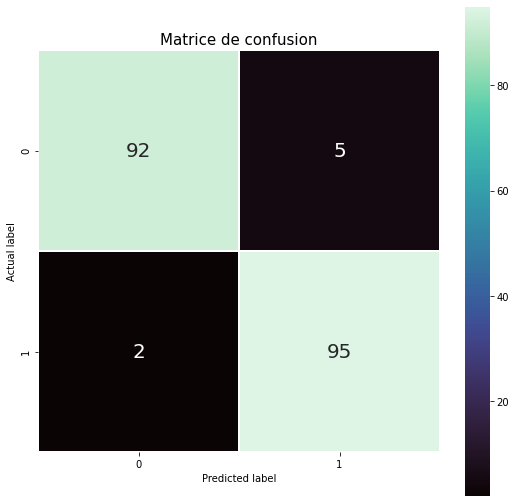

In [24]:
# Afficher la matrice de confusion de cette prédiction
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako', annot_kws={"fontsize":20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 15)

In [22]:
# model.save('mask_detection')

INFO:tensorflow:Assets written to: mask_detection\assets
